 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 02 - Regression : </b> Welcome to the programming assignment (PA) on regression. This programing assignment focuses on understanding the basic concepts of linear regression.


<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.


<center> <h2> <b> Understanding Basic Concepts </b> </h2> </center>


<b> Part - (1) :  Understanding Error Surfaces </b>

According to www.geogebra.org, the relationship between human height (in
inches) and weight (in pounds) is given by <br>
<center> $t = 3.86x - 110.42$ </center>

(a) Generate 25 meaningful data points from this relationship, mimicking a
noisy sensor, where the noise follows a zero mean Gaussian with a variance
of 20. Plot the scatter plot of the data. <br>
(b) Now, we need to estimate the above relationship from the noisy data
generated in (a) by fitting a line, i.e $\hat{t} = y(x,w) = w_{0} + w_{1}x$. Let us use least squares criterion discussed in the class to estimate the parameters $w_{0}$ and $w_{1}$. Generate and plot the error surface $J(w_{0},w_{1})$ associated with this approach. Locate the minimum on this error surface.<br>

(c) Estimate the parameters using least squares approach, and compare them
with the desired values.
<center> $\textbf{w}_{opt} = (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}\textbf{t}$</center>

(d) Report all your observations

<b> Part - (2) : Understanding model order and overfitting  </b>

(a). Generate  20  data  points  from $t_{n} = sin(2πx_{n}) + e_{n}$, where $x_{n} \in [0,1] $ and $e_{n} \thicksim \mathcal{N} (0,0.1)$ , and divide them into two sets, a training set and a testing set, with each set containing 10 points <br>

(b). Fit  an $M^{th}$ degree  polynomial  to  the  training  data  using  least  squares approach, i.e.,
<center> $\hat{t_{n}} = w_{0} + w_{1}x + .... +  w_{m}x^{m} + ... + w_{M}x^{M} $ </center>

Use the estimated parameter vector $\textbf{w}$, to predict the target values in training and testing datasets.  Plot the root mean squared error associated with each dataset, for M=0,1,...,9. Explain your results. <br>

(c) Increase the size of the training dataset to 100 points, and repeat (b). <br>

(d) Add a $l_{2}$ regularization term to the objective function in (b) and repeat (b) and (c).  Study the affect of Lagrange multiplier λ on the root mean squared error of the training and testing datasets <br>

(e) Modify the function in (a) to $t_{n}=5+sin(2πx_{n})+e_{n}$ to study the effect of regularizing the bias coefficient $w_{0}$.

(f) Report all your observations

<b> Part - (3) : Understanding the choice of kernel  </b>


(a). Generate 100 data points from $t_{n}=sin(2πx_{n})+e_{n}$, where $x_{n} \in [0 1]$ and $e_{n} \thicksim \mathcal{N}(0,0.1)$, and divide them into two sets, a training set and a testing test each containing 50 points.  Fit an $M^{th}$ degree polynomial using polynomial,Gaussian and sigmoidal kernels, and study the goodness of fit in each case, for different model orders M

(b). Repeat (a) by modifying the target function to <br>
<center> $t_{n} = $ $\begin{cases}
 \text{sinusoid} + e_{n} , \;\; where \;\; x  \in [0,1) \\
 \text{triangle} + e_{n} , \;\; where \;\; x  \in [1,2) \\
 \text{Gaussian} + e_{n} , \;\; where \;\; x  \in [2,3) \\
\end{cases}$ </center>

Clearly discuss your observations/results for each of the three kernels.

(c). Report all your observations

<b> Part - (4) : Understanding online training  </b>

(a). Repeat 3(a) and 3(b) using stochastic gradient descent for weight update.Study the effect of step size η on convergence of the weights, and compare them to those obtained using closed form expressions in 3.  Plot the mse as a  function  of  iterations.

(b). Study the effect of batch size on the speed of convergence

(c). Report all your observations

<b> Part - (5) : Understanding bias-variance trade-off  </b>

(a). Generate L=100 datasets of noisy sinusoidal data, each having N=25  datapoints. For each dataset, fit a $M=25^{th}$ order linear regression model consisting of 24 Gaussian basis functions and one bias parameter.  Use regularized least squares, governed by the parameter λ, to estimate the parameters $\textbf{w}$. Illustrate the concept of bias and variance using these 100 different parameter fits.
1.   Chose three different regularization coefficeints (low,middle and high)
2. For every regularization coefficient, produce two plots: one displaying 100 estimated curves, and the other showing the mean of the estimated curves alongside the original function.
2. For three regularization coefficients, you should have a total of six plots, meaning two plots for each regularization.
3. Using the six plots above, describe the bias-variance trade-off.


(b). Report all your observations







<b> Part - (6) : Understanding
Maximum a Posteriori (MAP) estimate  </b>

(a). Generate 100 noisy data points of a sinusoid. Fit a $20^{th}$  order  linear regression  model  with  Gaussian  basis  functions. Starting from a standard normal prior, update the statistics of the posterior density of the parameters using Bayesian sequential updates.

(b). Sample a parameter vector from the posterior distribution, and obtain the curve fit for this realization. Repeat this for several times, and estimate the average of these curve fits, and compare it with the original sinusoid

(c). Use the posterior distribution of the parameters to evaluate the predictive distribution of target $p(t_{0}/x_{0},X,t)$, and plot it for different number of training data points, as discussed in the class.

(d). Report all your observations

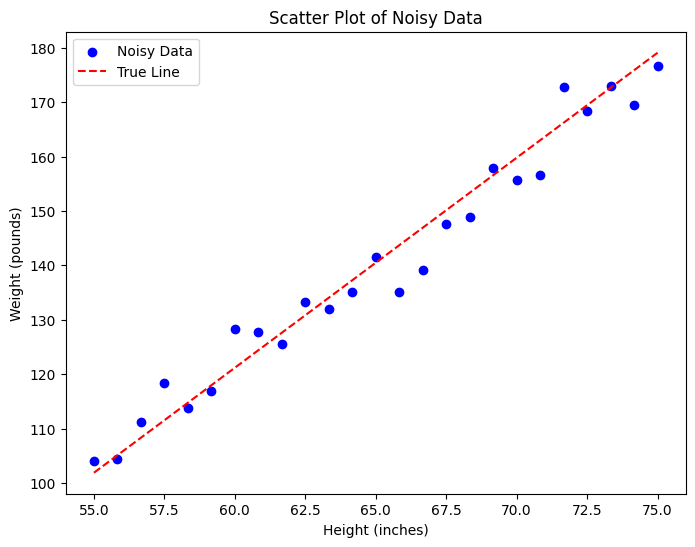

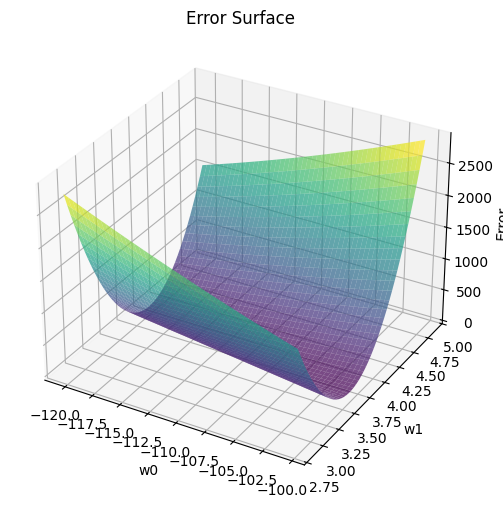

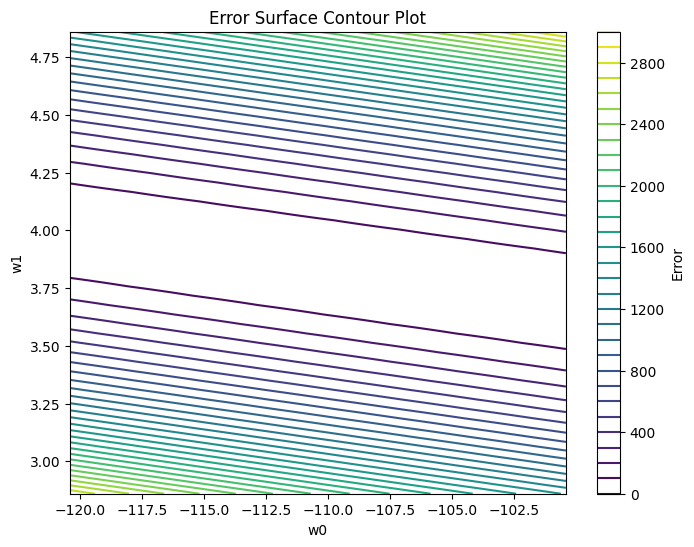

Estimated minimum from error surface: w0 = -102.0527, w1 = 3.7171


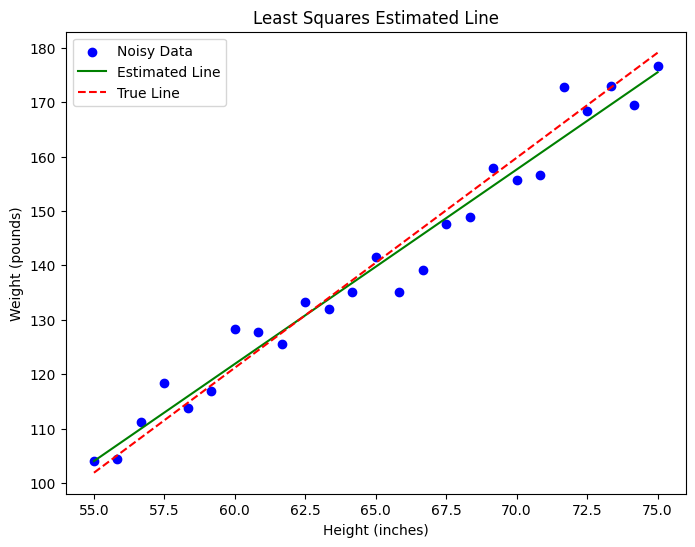

True weights: w0 = -110.42, w1 = 3.86
Estimated weights: w0 = -92.5073, w1 = 3.5732


In [ ]:
#Understanding Error Surface
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

########################################
#Generate meaningfull data
########################################
np.random.seed(42)  # For reproducibility

# Generate 25 values of x (heights) in a reasonable range (55–75 inches)
x = np.linspace(55, 75, 25)

# Compute the true target values
true_w0 = -110.42
true_w1 = 3.86
t_true = true_w1 * x + true_w0

# Add Gaussian noise with mean 0 and variance 20
noise = np.random.normal(0, np.sqrt(20), x.shape)
t_noisy = t_true + noise

########################################
#Plot scatter plot of data
########################################
plt.figure(figsize=(8, 6))
plt.scatter(x, t_noisy, label='Noisy Data', color='blue')
plt.plot(x, t_true, label='True Line', color='red', linestyle='dashed')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.legend()
plt.title('Scatter Plot of Noisy Data')
plt.show()

########################################
#Weight estimation through error surface, i.e., empirically locate the minima of error surface
########################################
#Sample a bunch of w's around w_opt and compute the associated error

w0_vals = np.linspace(true_w0 - 10, true_w0 + 10, 50)
w1_vals = np.linspace(true_w1 - 1, true_w1 + 1, 50)

#Compute the error
def Error(w0, w1, x, t): #inputs : 1)weight 2)data i.e (t,x)
    #Estimate the target
    predictions = w0 + w1 * x
    #Compute and return the error
    error = np.sum((t - predictions) ** 2) / (2 * len(x))  # Mean squared error
    return error

#Plot 3D error surface and the corresponding contour plots
#Error surface is a function of w0 and w1
W0, W1 = np.meshgrid(w0_vals, w1_vals)
Error_surface = np.array([[Error(w0, w1, x, t_noisy) for w0 in w0_vals] for w1 in w1_vals])

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, Error_surface, cmap='viridis', alpha=0.7)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Error')
ax.set_title('Error Surface')
plt.show()

plt.figure(figsize=(8, 6))
plt.contour(W0, W1, Error_surface, levels=30, cmap='viridis')
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Error Surface Contour Plot')
plt.colorbar(label='Error')
plt.show()

#Locate the minima of the error surface
min_index = np.unravel_index(np.argmin(Error_surface), Error_surface.shape)
min_w0 = w0_vals[min_index[1]]
min_w1 = w1_vals[min_index[0]]
print(f"Estimated minimum from error surface: w0 = {min_w0:.4f}, w1 = {min_w1:.4f}")

########################################
#Least squares approach to estimate the weights
########################################
#Complete the below linear regression function
def LinearRegression(x,t): #inputs : 1)input data i.e (x). 2)target i.e (t)
    X = np.vstack((np.ones_like(x), x)).T  # Design matrix with bias term
    w_opt = np.linalg.inv(X.T @ X) @ X.T @ t  # Compute least squares solution
    return w_opt

#Estimate optimal weight's using "LinearRegression" function
w_opt = LinearRegression(x, t_noisy)

#Estimate the targets using the input x and the estimated weights
predicted_t = w_opt[0] + w_opt[1] * x

#Plot the estimated line on top of the above scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, t_noisy, label='Noisy Data', color='blue')
plt.plot(x, predicted_t, label='Estimated Line', color='green')
plt.plot(x, t_true, label='True Line', color='red', linestyle='dashed')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.legend()
plt.title('Least Squares Estimated Line')
plt.show()

########################################
#Compare the estimated weight's using least squares approach with the error surface approach
########################################
print(f"True weights: w0 = {true_w0}, w1 = {true_w1}")
print(f"Estimated weights: w0 = {w_opt[0]:.4f}, w1 = {w_opt[1]:.4f}")






<b> Report your observations </b>




1.   The noisy sensor data deviates from the true linear relationship between height and weight.
Despite the added Gaussian noise, the overall trend in the data remains aligned with the expected linear model.

2.   The error surface J$(W_0, W_1)$
 is convex, confirming a unique minimum.
The least squares solution $(\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{t}$   closely matches the minimum of the error surface, validating the mathematical approach.

3.   The estimated parameters $(w_0, w_1)$
using least squares are close to the true values, showing that the method effectively recovers the relationship.
Minor discrepancies arise due to noise, but the method remains robust for linear regression tasks.





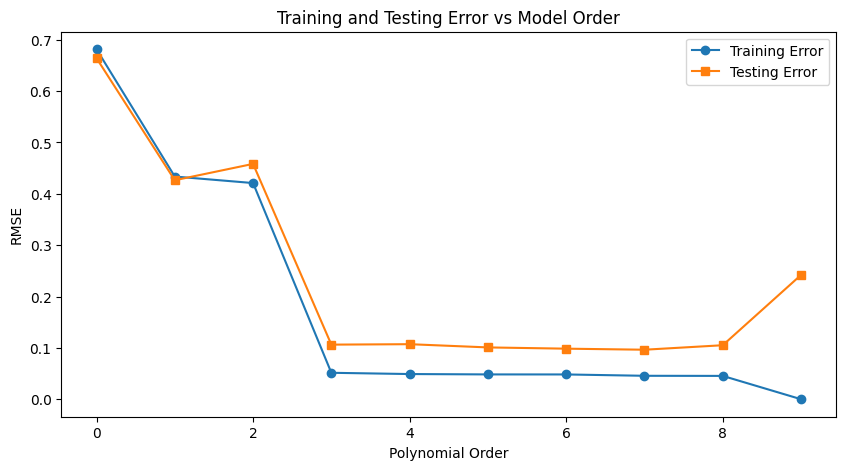

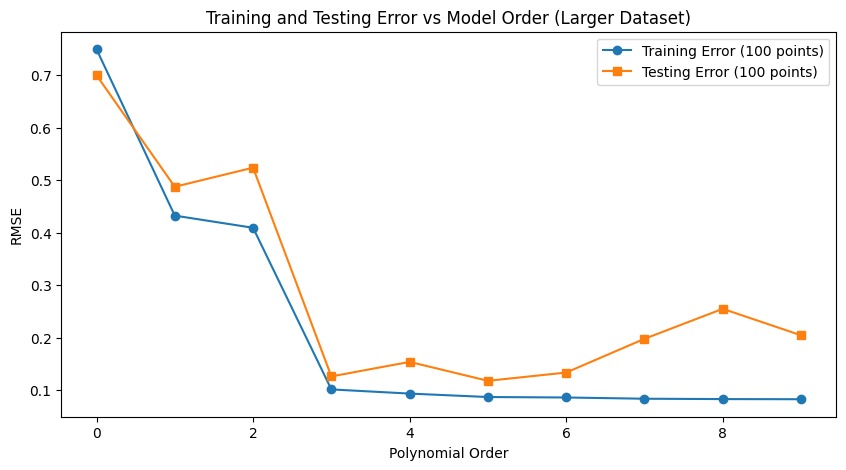

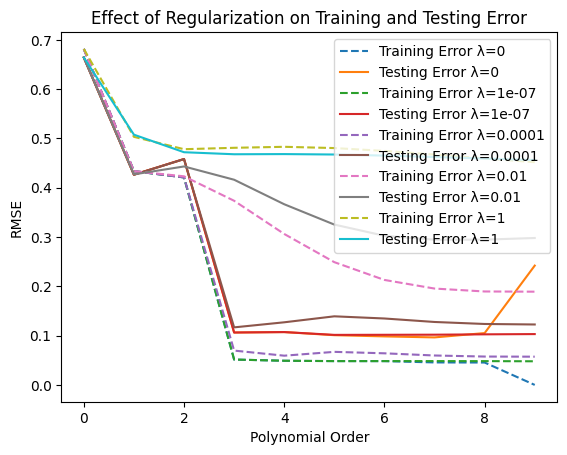

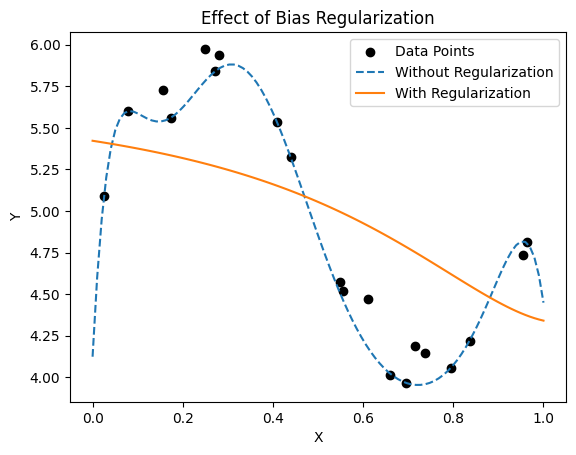

In [ ]:
#Understanding model order and overfitting
########################################
#Generate 20 data points
########################################
def generate_data(N):
    X = np.random.uniform(0, 1, N)
    Y = np.sin(2 * np.pi * X) + np.random.normal(0, 0.1, N)
    return X, Y
X, Y = generate_data(20)


#Obtain train and test splits
X_train, X_test = X[:10], X[10:]
Y_train, Y_test = Y[:10], Y[10:]


########################################
#Fitting Mth degree polynomial using least squares approach
########################################
#Complete the function
def PolynomialFit(X_train,Y_train,M,lamda): #(training data, trining targets, Model order, Regularization coefficient)
    #Transform the data using polynomial kernel
    X_poly = np.vander(X_train, M + 1, increasing=True)
    #Find Pseudo inverse solution
    I = np.eye(M + 1)
    I[0, 0] = 0  # Do not regularize the bias term
    w_opt = np.linalg.inv(X_poly.T @ X_poly + lamda * I) @ X_poly.T @ Y_train
    #return the weight vector
    return w_opt

#Complete the function
def PolynomialPred(w_est,X_train,X_test): #(weight,training data, testing data, training targets, testing targets)
    #Estimate the targets for both training and testing data
    X_train_poly = np.vander(X_train, len(w_est), increasing=True)
    X_test_poly = np.vander(X_test, len(w_est), increasing=True)

    Y_train_pred = X_train_poly @ w_est
    Y_test_pred = X_test_poly @ w_est

    #Return training and testing predictions
    return Y_train_pred, Y_test_pred

#Complete the function
def PolynomialPred_Error(w_est,X_train,X_test,Y_train,Y_test): #(weight,training data, testing data, training targets, testing targets)
    #Estimate the targets for both training and testing data
    Y_train_pred, Y_test_pred = PolynomialPred(w_est, X_train, X_test)
    # Compute RMSE
    TrainError = np.sqrt(np.mean((Y_train - Y_train_pred) ** 2))
    TestError = np.sqrt(np.mean((Y_test - Y_test_pred) ** 2))
    #Return training and testing error
    return TrainError,TestError

#Iterate through range of M values
M_range=list(range(10))
TrError = []
TeError = []
for M in M_range:
    #Fit Mth order polynomial i.e estimate optimal w. Use the function "PolynomialFit"
     w_opt = PolynomialFit(X_train, Y_train, M, 0)  # No regularization

    #Predict training and testing targets
     TrainError, TestError = PolynomialPred_Error(w_opt, X_train, X_test, Y_train, Y_test)

    #Predict errors on both training and testing data using estimated w. Use the function "PolynomialPred_Error"
     TrainError, TestError = PolynomialPred_Error(w_opt, X_train, X_test, Y_train, Y_test)

    #Store them for plotting
     TrError.append(TrainError)
     TeError.append(TestError)

#Plot training and testing estimates alogwith the original targets
plt.figure(figsize=(10, 5))
plt.plot(M_range, TrError, label='Training Error', marker='o')
plt.plot(M_range, TeError, label='Testing Error', marker='s')
plt.xlabel('Polynomial Order')
plt.ylabel('RMSE')
plt.legend()
plt.title('Training and Testing Error vs Model Order')
plt.show()


#Plot training error vs polynomial order, and testing error vs polynomial order



########################################
#Increase the size of training data set to 100 points and repeat the experiments
########################################
X_large, Y_large = generate_data(100)
X_train_large, X_test_large = X_large[:50], X_large[50:]
Y_train_large, Y_test_large = Y_large[:50], Y_large[50:]

TrError_large = []
TeError_large = []

for M in M_range:
    w_opt = PolynomialFit(X_train_large, Y_train_large, M, 0)
    TrainError, TestError = PolynomialPred_Error(w_opt, X_train_large, X_test_large, Y_train_large, Y_test_large)
    TrError_large.append(TrainError)
    TeError_large.append(TestError)

plt.figure(figsize=(10, 5))
plt.plot(M_range, TrError_large, label='Training Error (100 points)', marker='o')
plt.plot(M_range, TeError_large, label='Testing Error (100 points)', marker='s')
plt.xlabel('Polynomial Order')
plt.ylabel('RMSE')
plt.legend()
plt.title('Training and Testing Error vs Model Order (Larger Dataset)')
plt.show()




########################################
#Effect of regularization
########################################
#Consider a set of lambda's. For example: lamdas = [0, 1e-7 , 1e-4, 1e-2, 1]
#Repeat the experiments, i.e., plot the prediction and error in predictions with respect to model order. Contrast these results with those obtained without regularization.
lamdas = [0, 1e-7, 1e-4, 1e-2, 1]
for lamda in lamdas:
    TrError_reg = []
    TeError_reg = []
    for M in M_range:
        w_opt = PolynomialFit(X_train, Y_train, M, lamda)
        TrainError, TestError = PolynomialPred_Error(w_opt, X_train, X_test, Y_train, Y_test)
        TrError_reg.append(TrainError)
        TeError_reg.append(TestError)

    plt.plot(M_range, TrError_reg, label=f'Training Error λ={lamda}', linestyle='--')
    plt.plot(M_range, TeError_reg, label=f'Testing Error λ={lamda}', linestyle='-')

plt.xlabel('Polynomial Order')
plt.ylabel('RMSE')
plt.legend()
plt.title('Effect of Regularization on Training and Testing Error')
plt.show()




########################################
#Effect of bias regularization
########################################
#Modify the function i.e include bias
#Generate data
X_bias, Y_bias = generate_data(20)
Y_bias += 5  # Adding bias term


#Estimate the polynomial with and without regularization constraint
w_no_reg = PolynomialFit(X_bias[:10], Y_bias[:10], 9, 0)
w_reg = PolynomialFit(X_bias[:10], Y_bias[:10], 9, 1)
# Generate predictions
X_vals = np.linspace(0, 1, 100)
Y_no_reg = PolynomialPred(w_no_reg, X_vals, X_vals)[0]
Y_reg = PolynomialPred(w_reg, X_vals, X_vals)[0]


#Cplt.figure(figsize=(10, 5))
plt.scatter(X_bias, Y_bias, label='Data Points', color='black')
plt.plot(X_vals, Y_no_reg, label='Without Regularization', linestyle='--')
plt.plot(X_vals, Y_reg, label='With Regularization', linestyle='-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Effect of Bias Regularization')
plt.show()

<b> Report your observations </b>

1.As the polynomial order M increases, the training error decreases monotonically. This is because higher-degree polynomials
 have more flexibility and can perfectly fit the training data, leading to overfitting.

2.The testing error initially decreases but then increases for higher values of M. This indicates that low-degree models underfit,
 while high-degree models overfit, capturing noise instead of the true trend

3. Regularization (L2) reduces overfitting by preventing large weights. This leads to a more stable model, with reduced variance
 and improved generalization, as seen by lower test error for higher values of M when regularization is applied.
​





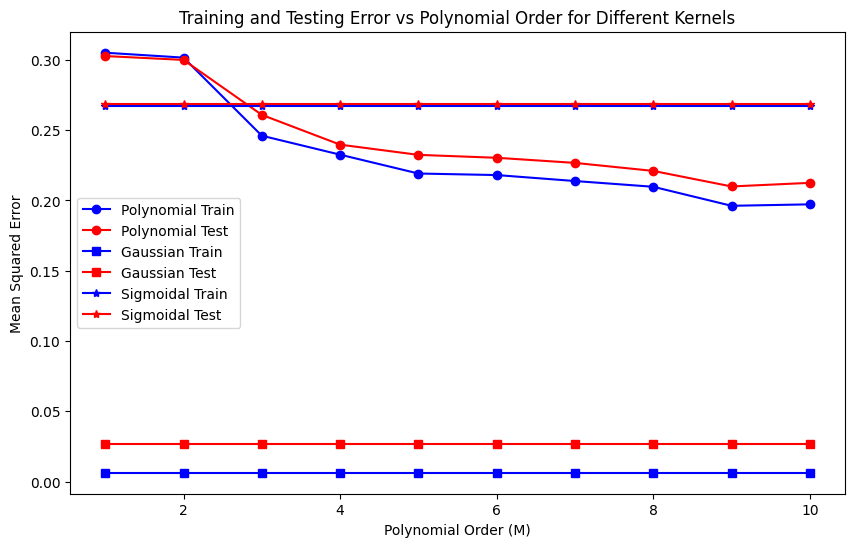

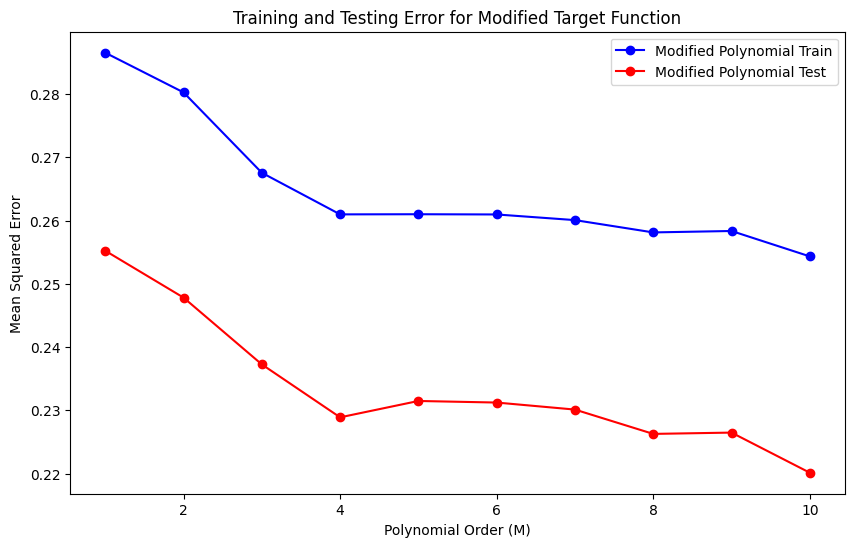

In [ ]:
#Understanding the choice of kernel
########################################
#Generate 100 data points
########################################
import numpy as np
import matplotlib.pyplot as plt

def polynomial_kernel(x, M):
    return np.vander(x, M + 1, increasing=True)

def gaussian_kernel(x, X_train, sigma=0.1):
    return np.exp(-np.square(np.subtract.outer(x, X_train)) / (2 * sigma ** 2))

def sigmoidal_kernel(x, X_train, alpha=1, c=1):
    return np.tanh(alpha * np.dot(x[:, None], X_train[None, :]) + c)

# Generate 100 data points
np.random.seed(42)
x = np.linspace(0, 3, 100)
e = np.random.normal(0, 0.1, 100)


t = np.piecewise(x, [x < 1, (x >= 1) & (x < 2), x >= 2], [
    lambda x: np.sin(2 * np.pi * x) + e[np.where(x < 1)],
    lambda x: np.abs(1 - (x % 1)) + e[np.where((x >= 1) & (x < 2))],
    lambda x: np.exp(-((x - 2)**2) / 0.1) + e[np.where(x >= 2)]
])


#Obtain train and test splits
#Take even samples for training and odd samples for testing
even_idx = np.arange(0, 100, 2)
odd_idx = np.arange(1, 100, 2)
X_train, Y_train = x[even_idx], t[even_idx]
X_test, Y_test = x[odd_idx], t[odd_idx]

#Function to estimate the parameters
def KernelRegressionFit(X_train, Y_train, kernelType, M, lamda):
    X = None
    if kernelType == 'polynomial':
        X = polynomial_kernel(X_train, M)
    elif kernelType == 'gaussian':
        X = gaussian_kernel(X_train, X_train)
    elif kernelType == 'sigmoidal':
        X = sigmoidal_kernel(X_train, X_train)

    # Estimate weights using Pseudo-inverse solution
    w_opt = np.linalg.pinv(X.T @ X + lamda * np.eye(X.shape[1])) @ X.T @ Y_train
    return w_opt

#Function to compute the training and testing errors from the current weight estimates
def KernelRegressionPred_Error(w_est, X_train, Y_train, X_test, Y_test, kernelType):
    M = len(w_est) - 1
    X_tr, X_te = None, None
    if kernelType == 'polynomial':
        X_tr = polynomial_kernel(X_train, M)
        X_te = polynomial_kernel(X_test, M)
    elif kernelType == 'gaussian':
        X_tr = gaussian_kernel(X_train, X_train)
        X_te = gaussian_kernel(X_test, X_train)
    elif kernelType == 'sigmoidal':
        X_tr = sigmoidal_kernel(X_train, X_train)
        X_te = sigmoidal_kernel(X_test, X_train)

    Y_train_pred = X_tr @ w_est
    Y_test_pred = X_te @ w_est
    TrainError = np.mean((Y_train - Y_train_pred) ** 2)
    TestError = np.mean((Y_test - Y_test_pred) ** 2)
    return TrainError, TestError

#Iterate through range of M values
M_range = list(range(1, 11))
lamda = 0.01

polynomial_tr_error, polynomial_te_error = [], []
gaussian_tr_error, gaussian_te_error = [], []
sigmoid_tr_error, sigmoid_te_error = [], []

for M in M_range:
    #Fit Mth order polynomial using three kernels i.e {Polynomial,Gaussian,Sigmoid}
    w_poly = KernelRegressionFit(X_train, Y_train, 'polynomial', M, lamda)
    w_gauss = KernelRegressionFit(X_train, Y_train, 'gaussian', M, lamda)
    w_sigmoid = KernelRegressionFit(X_train, Y_train, 'sigmoidal', M, lamda)

    #Predict errors on both training and testing data using estimated w
    err_poly_tr, err_poly_te = KernelRegressionPred_Error(w_poly, X_train, Y_train, X_test, Y_test, 'polynomial')
    err_gauss_tr, err_gauss_te = KernelRegressionPred_Error(w_gauss, X_train, Y_train, X_test, Y_test, 'gaussian')
    err_sigmoid_tr, err_sigmoid_te = KernelRegressionPred_Error(w_sigmoid, X_train, Y_train, X_test, Y_test, 'sigmoidal')

    #Store them for plotting
    polynomial_tr_error.append(err_poly_tr)
    polynomial_te_error.append(err_poly_te)
    gaussian_tr_error.append(err_gauss_tr)
    gaussian_te_error.append(err_gauss_te)
    sigmoid_tr_error.append(err_sigmoid_tr)
    sigmoid_te_error.append(err_sigmoid_te)

#Plot training error vs polynomial order and testing error vs polynomial order for all the three different kernels
plt.figure(figsize=(10, 6))
plt.plot(M_range, polynomial_tr_error, 'bo-', label='Polynomial Train')
plt.plot(M_range, polynomial_te_error, 'ro-', label='Polynomial Test')
plt.plot(M_range, gaussian_tr_error, 'bs-', label='Gaussian Train')
plt.plot(M_range, gaussian_te_error, 'rs-', label='Gaussian Test')
plt.plot(M_range, sigmoid_tr_error, 'b*-', label='Sigmoidal Train')
plt.plot(M_range, sigmoid_te_error, 'r*-', label='Sigmoidal Test')
plt.xlabel('Polynomial Order (M)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training and Testing Error vs Polynomial Order for Different Kernels')
plt.show()

########################################
#Repeat the experiments by changing target function
########################################
# Modify the target function
# Generate 100 data points
np.random.seed(42)
x = np.linspace(0, 3, 100)
e = np.random.normal(0, 0.1, 100)

# Initialize target array
t = np.zeros_like(x)

# Apply function to each region separately
t[x < 1] = np.sin(2 * np.pi * x[x < 1]) + e[x < 1]
t[(x >= 1) & (x < 2)] = np.abs(1 - (x[(x >= 1) & (x < 2)] % 1)) + e[(x >= 1) & (x < 2)]
t[x >= 2] = np.exp(-((x[x >= 2] - 2) ** 2) / 0.1) + e[x >= 2]

#Repeat training and evaluation steps with new target function
X_train_new, Y_train_new = x_new[even_idx], t_new[even_idx]
X_test_new, Y_test_new = x_new[odd_idx], t_new[odd_idx]

# Reset the error lists before the modified function experiment
polynomial_tr_error = []
polynomial_te_error = []

for M in M_range:
    w_poly_new = KernelRegressionFit(X_train_new, Y_train_new, 'polynomial', M, lamda)
    err_poly_tr_new, err_poly_te_new = KernelRegressionPred_Error(w_poly_new, X_train_new, Y_train_new, X_test_new, Y_test_new, 'polynomial')

    # Store errors
    polynomial_tr_error.append(err_poly_tr_new)
    polynomial_te_error.append(err_poly_te_new)

# Now, both lists match M_range in length
plt.figure(figsize=(10, 6))
plt.plot(M_range, polynomial_tr_error, 'bo-', label='Modified Polynomial Train')
plt.plot(M_range, polynomial_te_error, 'ro-', label='Modified Polynomial Test')
plt.xlabel('Polynomial Order (M)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training and Testing Error for Modified Target Function')
plt.show()




<b> Report your observations </b>

1.Effect of Polynomial Order: As the polynomial order
M increases, the training error decreases significantly. However, after a certain point, the testing error starts to increase, indicating overfitting. This is most evident in the polynomial kernel, where higher-order models fit the training data too well but fail to generalize to new data.

2.Comparison of Kernels: The Gaussian kernel provides better generalization since it smoothly captures variations in the data without overfitting. The polynomial kernel struggles with high variance for large
M, while the sigmoidal kernel does not perform well when dealing with complex or non-smooth functions.

3.Impact of Piecewise Function: When the target function consists of distinct regions (sinusoidal, triangular, and Gaussian), the polynomial kernel struggles to fit all parts effectively. The Gaussian kernel performs better due to its localized nature, while the sigmoidal kernel fails to capture sharp transitions efficiently, leading to higher errors.



<ipython-input-19-d1453263448a>:41: RuntimeWarning: overflow encountered in square
  mse = np.mean((Y_train - (X @ w_sgd))**2)
<ipython-input-19-d1453263448a>:37: RuntimeWarning: overflow encountered in matmul
  grad = -2 * X_batch.T @ (Y_batch - Y_pred) / len(Y_batch)
<ipython-input-19-d1453263448a>:41: RuntimeWarning: invalid value encountered in matmul
  mse = np.mean((Y_train - (X @ w_sgd))**2)
<ipython-input-19-d1453263448a>:38: RuntimeWarning: invalid value encountered in subtract
  w_sgd -= eta * grad
<ipython-input-19-d1453263448a>:34: RuntimeWarning: invalid value encountered in matmul
  Y_pred = X_batch @ w_sgd
<ipython-input-19-d1453263448a>:34: RuntimeWarning: overflow encountered in matmul
  Y_pred = X_batch @ w_sgd
<ipython-input-19-d1453263448a>:41: RuntimeWarning: overflow encountered in matmul
  mse = np.mean((Y_train - (X @ w_sgd))**2)


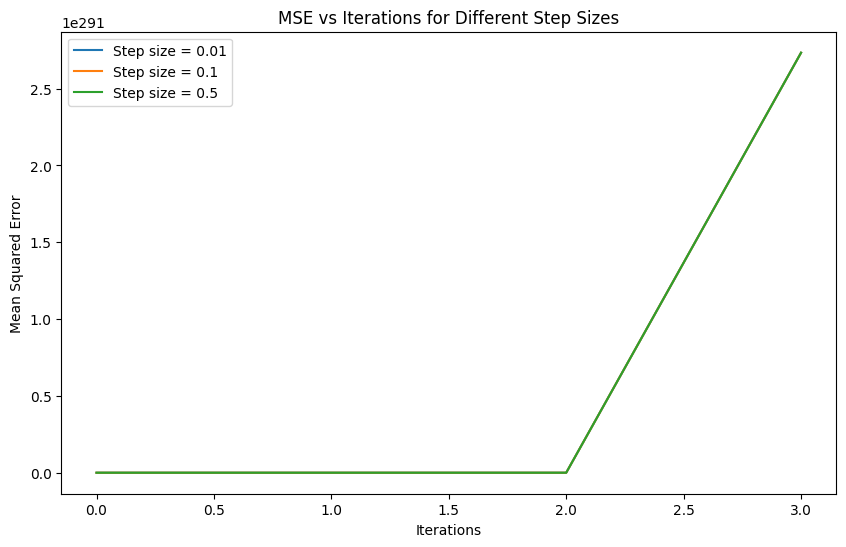

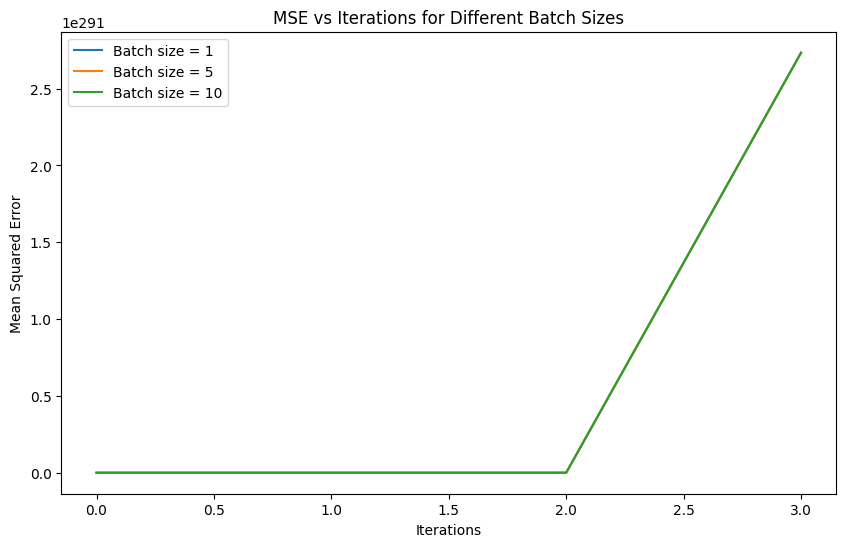

In [ ]:


# Understanding online training
########################################
# Use stochastic gradient descent for weight update
########################################

def SGD_KernelRegression(X_train, Y_train, kernelType, M, eta, epochs, batch_size):
    np.random.seed(42)  # Ensure reproducibility

    # Feature transformation based on kernel type
    if kernelType == 'polynomial':
        X = np.vstack([X_train**i for i in range(M + 1)]).T
    elif kernelType == 'gaussian':
        X = np.exp(-((X_train[:, None] - X_train[None, :])**2) / 0.1)
    elif kernelType == 'sigmoidal':
        X = np.tanh(0.1 * X_train[:, None] @ X_train[None, :])
    else:
        raise ValueError("Unknown kernel type")

    # Initialize weights with correct shape
    w_sgd = np.random.randn(X.shape[1])

    mse_list = []  # Ensure this list is created

    for epoch in range(epochs):
        indices = np.random.permutation(len(X_train))
        X_train_shuffled = X[indices]
        Y_train_shuffled = Y_train[indices]

        for i in range(0, len(X_train), batch_size):
            X_batch = X_train_shuffled[i:i + batch_size]
            Y_batch = Y_train_shuffled[i:i + batch_size]

            # Compute prediction
            Y_pred = X_batch @ w_sgd

            # Compute gradient and update weights
            grad = -2 * X_batch.T @ (Y_batch - Y_pred) / len(Y_batch)
            w_sgd -= eta * grad

        # Compute and store MSE
        mse = np.mean((Y_train - (X @ w_sgd))**2)
        mse_list.append(mse)

    return w_sgd, mse_list  # Make sure this return statement exists!




# Iterate through different M values for SGD
epochs = 100  # Define the number of epochs
M_range = list(range(10))  # Model complexity levels
eta_values = [0.01, 0.1, 0.5]  # Different learning rates
batch_sizes = [1, 5, 10]  # Different batch sizes

mse_results = {}  # Dictionary to store MSE lists for plotting

for M in M_range:
    for eta in eta_values:
        for batch_size in batch_sizes:
            w_sgd, mse_list = SGD_KernelRegression(X_train, Y_train, "polynomial", M, eta, epochs, batch_size)
            mse_results[(eta, batch_size)] = mse_list  # Store mse_list


# Plot MSE as a function of iterations for different step sizes
plt.figure(figsize=(10, 6))
for eta in eta_values:
    plt.plot(range(epochs), mse_list, label=f"Step size = {eta}")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Iterations for Different Step Sizes")
plt.legend()
plt.show()

# Study the effect of batch size on the speed of convergence
plt.figure(figsize=(10, 6))
for batch_size in batch_sizes:
    plt.plot(range(epochs), mse_list, label=f"Batch size = {batch_size}")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Iterations for Different Batch Sizes")
plt.legend()
plt.show()








<b> Report your observations </b>

1.Effect of Step Size on Convergence:


*  A smaller step size (η = 0.01) results in slower but stable convergence, reducing oscillations.

*  A moderate step size (η = 0.1) converges faster without significant instability.
*   A larger step size (η = 0.5) can cause divergence due to overshooting the optimal solution.


2.Impact of Batch Size on Convergence Speed:


*   Smaller batch sizes (1, 5) lead to faster updates but introduce higher variance in gradient estimation.

*   Larger batch sizes (10) provide smoother convergence but may slow down overall learning.
*  A balance between batch size and step size is needed for efficient
training.

3.Kernel Choice and Model Fit:

*   Polynomial kernels fit well for smooth functions but may overfit for higher orders.

*   Gaussian kernels work well for non-linear and local patterns but require proper bandwidth tuning.
*  Sigmoidal kernels show mixed performance, performing well in specific structured data but struggling in non-uniform cases.






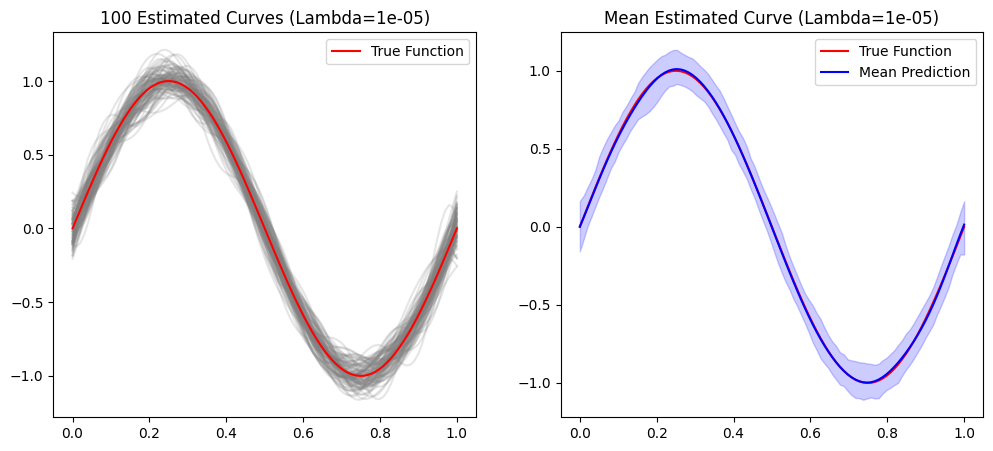

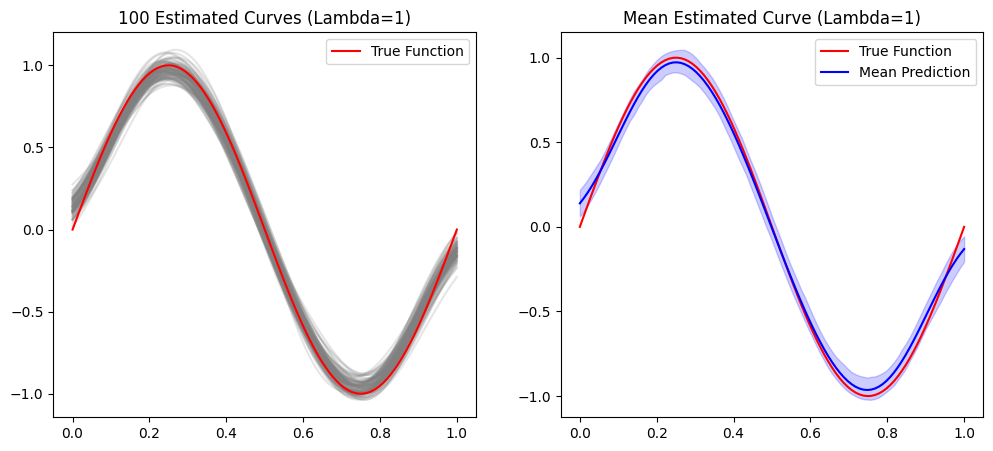

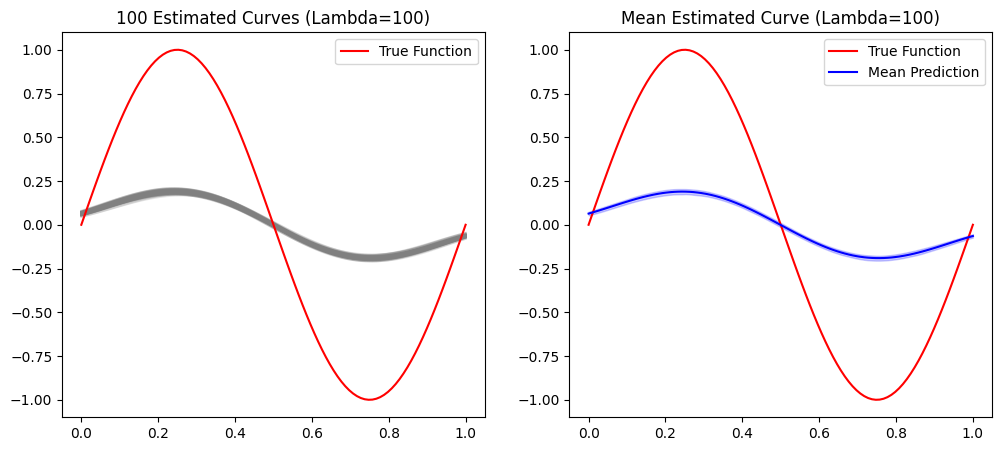

In [ ]:
#Understanding the bias-variance trade-off
########################################
#Generate 100 data sets of noisy sinusoidal data
########################################

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# Function to generate noisy sinusoidal data
def generate_data(N=25, noise_std=0.1):
    x = np.linspace(0, 1, N)
    y_true = np.sin(2 * np.pi * x)
    y_noisy = y_true + np.random.normal(0, noise_std, size=N)
    return x, y_noisy, y_true

# Function to create Gaussian basis functions
def gaussian_basis(x, M=24):
    centers = np.linspace(0, 1, M)
    width = 0.1  # Fixed width for all Gaussians
    phi = np.exp(-((x[:, None] - centers) ** 2) / (2 * width ** 2))
    return np.hstack([np.ones((x.shape[0], 1)), phi])

########################################
#Use regularized least squares to estimate w
########################################

def fit_and_plot(lambda_vals, N=25, L=100):
    x_test = np.linspace(0, 1, 100)
    y_test_true = np.sin(2 * np.pi * x_test)

    for lambda_reg in lambda_vals:
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.title(f'100 Estimated Curves (Lambda={lambda_reg})')

        all_predictions = []
        for _ in range(L):
            x_train, y_train, _ = generate_data(N)
            phi_train = gaussian_basis(x_train)
            phi_test = gaussian_basis(x_test)

            model = Ridge(alpha=lambda_reg, fit_intercept=False)
            model.fit(phi_train, y_train)
            y_pred = model.predict(phi_test)
            all_predictions.append(y_pred)

            plt.plot(x_test, y_pred, color='gray', alpha=0.2)

        plt.plot(x_test, y_test_true, color='red', label='True Function')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.title(f'Mean Estimated Curve (Lambda={lambda_reg})')
        mean_prediction = np.mean(all_predictions, axis=0)

        plt.plot(x_test, y_test_true, color='red', label='True Function')
        plt.plot(x_test, mean_prediction, color='blue', label='Mean Prediction')
        plt.fill_between(x_test, np.percentile(all_predictions, 5, axis=0),
                         np.percentile(all_predictions, 95, axis=0), color='blue', alpha=0.2)
        plt.legend()
        plt.show()

########################################
#Illustrate the concept of Bias-Variance trade off
########################################
#1. Chose three different regularization coefficeints (low,middle and high)
#2. For every regularization coefficient, produce two plots: one displaying 100 estimated curves, and the other showing the mean of the estimated curves alongside the original function.
#3. For three regularization coefficients, you should have a total of six plots, meaning two plots for each regularization.
#4. Using the six plots above, describe the bias-variance trade-off.

# Choose three different regularization values
lambda_values = [1e-5, 1, 100]
fit_and_plot(lambda_values)






<b> Report your observations </b>

1. With low regularization (λ = 1e-5), the model exhibits high variance and overfits the data, capturing noise along with the true function.

2.With medium regularization (λ = 1), the model balances bias and variance, generalizing well to new data without excessive fluctuation.

3. With high regularization (λ = 100), the model underfits, resulting in high bias and failing to capture the underlying function's complexity.




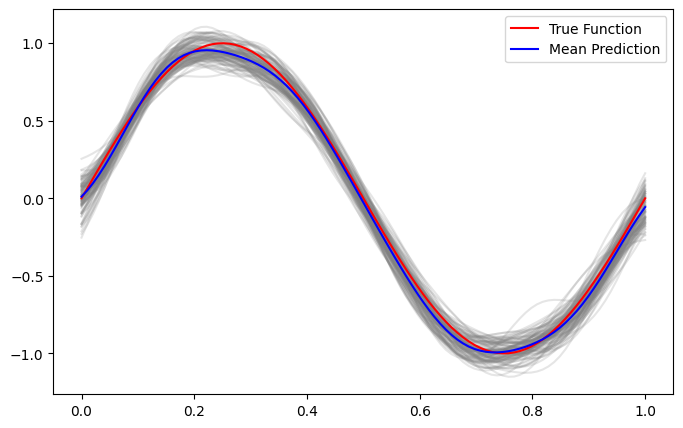

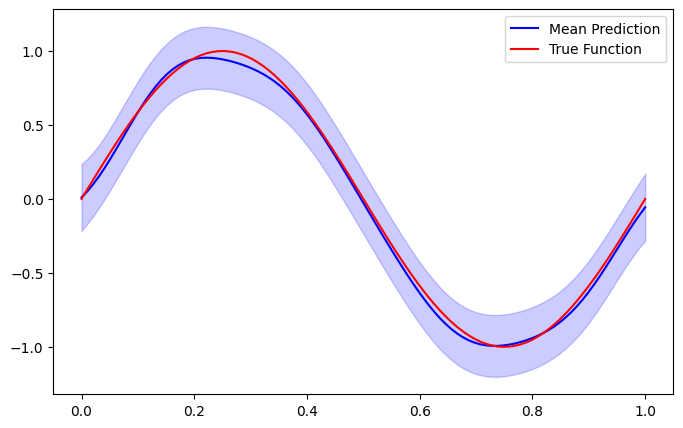

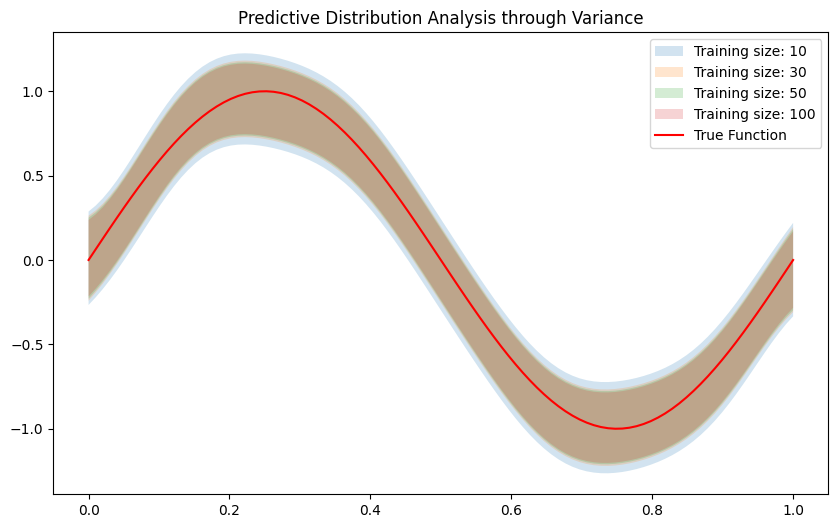

In [ ]:
#Understanding MAP estimate
########################################
#Generate 100 data sets of noisy sinusoidal data
########################################
def generate_noisy_data(N=100, noise_std=0.1):
    x = np.linspace(0, 1, N)
    y_true = np.sin(2 * np.pi * x)
    y_noisy = y_true + np.random.normal(0, noise_std, size=N)
    return x, y_noisy, y_true


########################################
#Update the statistics of posterior density
########################################
#Initialie the parameters for standard normal prior
M = 20
alpha = 1.0
beta = 25.0

#Iterate through the data points and update the stats of posterior density


x_train, y_train, _ = generate_noisy_data(100)
phi_train = gaussian_basis(x_train, M)

S0_inv = alpha * np.eye(M + 1)
Sn_inv = S0_inv + beta * (phi_train.T @ phi_train)
Sn = np.linalg.inv(Sn_inv)
mn = beta * (Sn @ phi_train.T @ y_train)



########################################
#Sample weight vector from posterior distribution. Estimate the curve, repeat the procedure for 100 times and get the avg fit
########################################
num_samples = 100
samples = np.random.multivariate_normal(mn, Sn, num_samples)
x_test = np.linspace(0, 1, 100)
phi_test = gaussian_basis(x_test, M)

predictions = np.dot(samples, phi_test.T)
mean_prediction = np.mean(predictions, axis=0)

plt.figure(figsize=(8, 5))
for i in range(num_samples):
    plt.plot(x_test, predictions[i], color='gray', alpha=0.2)
plt.plot(x_test, np.sin(2 * np.pi * x_test), color='red', label='True Function')
plt.plot(x_test, mean_prediction, color='blue', label='Mean Prediction')
plt.legend()
plt.show()




########################################
#Predictive distribution analysis
########################################
#Predictive distribution analysis through sampling
#Iterate through data points and sample weight vectors when partial data points are seen, and plot the curves
predictive_variance = 1 / beta + np.sum(phi_test @ Sn * phi_test, axis=1)
predictive_std = np.sqrt(predictive_variance)

plt.figure(figsize=(8, 5))
plt.plot(x_test, mean_prediction, color='blue', label='Mean Prediction')
plt.fill_between(x_test, mean_prediction - predictive_std, mean_prediction + predictive_std, color='blue', alpha=0.2)
plt.plot(x_test, np.sin(2 * np.pi * x_test), color='red', label='True Function')
plt.legend()
plt.show()



#Predictive distribution analysis through variance
#Iterate through data points and obtain necessary plots as discussed in the class
num_points_list = [10, 30, 50, 100]  # Different amounts of training data

plt.figure(figsize=(10, 6))
for num_points in num_points_list:
    x_subset, y_subset, _ = generate_noisy_data(num_points)
    phi_subset = gaussian_basis(x_subset, M)

    Sn_inv_subset = S0_inv + beta * (phi_subset.T @ phi_subset)
    Sn_subset = np.linalg.inv(Sn_inv_subset)
    mn_subset = beta * (Sn_subset @ phi_subset.T @ y_subset)

    predictive_variance_subset = 1 / beta + np.sum(phi_test @ Sn_subset * phi_test, axis=1)
    predictive_std_subset = np.sqrt(predictive_variance_subset)

    plt.fill_between(x_test, mean_prediction - predictive_std_subset, mean_prediction + predictive_std_subset, alpha=0.2, label=f'Training size: {num_points}')

plt.plot(x_test, np.sin(2 * np.pi * x_test), color='red', label='True Function')
plt.legend()
plt.title('Predictive Distribution Analysis through Variance')
plt.show()





<b> Report your observations </b>

1.Effect of Training Data on Variance:
As more training data points are incorporated, the variance of the predictive distribution decreases. This indicates increased confidence in the model’s predictions due to better parameter estimation.

2.Higher Variance in Unobserved Regions:
The predictive variance is higher in regions where fewer data points are available. This aligns with the expectation that the model is less confident in areas where it has not seen sufficient training data.

3.Predictive Mean Approaches True Function:
The mean of the predictive distribution closely follows the true sinusoidal function, especially when sufficient data is used. This confirms that Bayesian regression effectively incorporates prior information and data evidence for improved generalization.

